# Unsupervised Modelling

---
### <i>Changelogs:</i>

  Name  |  Date  |   Description
- **Kiet Vu**  |  03/17  |  Create notebook, clean data in firmographic dataset.Reorganize folder and files.
- **Kiet Vu**  |  03/17  | Minor Editing.
- **Kiet Vu**  |  04/13  | Run KMode Clustering on specific atributes. 
- **Kiet Vu**  |  04/27  | Create PCA to choose the most important attributes. 
- **Kiet Vu**  |  04/29  | Since PCA is not good for categorical data, I will use MCA method.

---

- **[Setting Variables for Training](#Variables)**
<br>

- **[Clustering](#Clustering)**: 
Clustering is an unsupervised learning method that groups similar data points together based on the categorical attributes. There are several clustering algorithms available, including k-means, hierarchical clustering, and DBSCAN.
        Columns chosen:
<br>

- **[Principal Component Analysis (PCA)](#PCA)**: 
PCA is a dimensionality reduction technique that can be used to identify the underlying patterns in the categorical data. PCA transforms the categorical attributes into a lower-dimensional space, where the new dimensions are orthogonal and capture the most variance in the data.
        Columns chosen:
<br>

- **[Association Rule Mining](#AssociationRuleMining)**: 
Association rule mining is a technique used to discover frequent co-occurrences or correlations between categorical attributes. It can be used to identify relationships between different attributes and discover interesting patterns in the data.
        Columns chosen:
<br>

- **[Self-Organizing Maps (SOMs)](#SOM)**: 
SOMs are a type of artificial neural network that can be used for clustering and visualization of high-dimensional data. SOMs are useful for discovering hidden structures and patterns in the data.
        Columns chosen:
<br>

- **[Multiple Correspondence Analysis (MCA)](#MCA)**: 
        Columns chosen:
<br>

**it's important to note that unsupervised learning methods cannot make predictions on new data, as they do not have a target variable to train on. Instead, they can be used for exploratory analysis and to gain insights into the data.**

---

In [9]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [10]:
df = pd.read_csv("Clean Data/prep_dataset_20230429.csv", low_memory=False)
df.head(30)

unique_identifier     usage  usage_range  PA  IL  TX  OH   
0   000345e997e72b61b990d2689c76427f     556.3            1   1   0   0   0  \
1   00095201031df44962513f378842d521    5946.0            1   0   1   0   0   
2   000c88d34beda722f7b559bb056b7809  109258.0            4   0   0   1   0   
3   0012e632be3d04fab35771fe3fb6db31   15194.0            2   0   1   0   0   
4   00130d1949e17227076bc7e4f75139af   22534.0            2   0   0   0   1   
5   00132da27bf07ae535d944c55f820f3e  247200.0            5   0   1   0   0   
6   001bd1817a1253f08b137041be4c3c9d   49813.0            3   0   1   0   0   
7   001ed9def989e5da26bf2dfc2cb0e8cc    8083.0            1   0   0   0   0   
8   00218024e941fddb05762b121ebdf5d1    9535.0            1   0   0   0   0   
9   0025aeda3082aaa35e76bffefff29024    2517.0            1   0   0   0   0   
10  0026577e0126dccd4ae6928f8b5951e1   19025.0            2   0   0   0   1   
11  0026692138a0f60512c28f95bc26776e     240.0            1   0   0   0   1   
12  0027596a0e7252b3739cac6d56605226   68500.0            4   0   0   0   0   
13  0027a56994cb3c852a1da20ecc98ddc4   23857.8            2   0   1   0   0   
14  002b16fa70e9ed3ccc4b781b2f6bafc9    7874.0            1   0   0   0   0   
15  00310c118abb5a7c78ae8418080acc48  131522.0            5   0   0   0   0   
16  0032955b85e1b0b2e2afcf0636106e0e   11409.0            2   0   1   0   0   
17  0033b3170cf31442bd45307a7f3c4662    3251.0            1   0   0   0   0   
18  0034108c45e4014cc7b73d3eab731385  108000.0            4   0   0   0   0   
19  0034842d5169ae7cf086b45b3653da24  340227.7            5   0   0   1   0   
20  00378d34547425d24405b1636b2044b9   35996.3            3   0   1   0   0   
21  0038474573488af37ca820bc3c1ff47b    6337.0            1   0   0   1   0   
22  0039a306be3c9591b6c0dad3612b7fd3    8691.0            1   1   0   0   0   
23  003c6b02a71d50a6671fcd49a9f3f021   27300.0            3   0   0   1   0   
24  003d0e3798feb33d9fa2504667624187   17466.0            2   1   0   0   0   
25  003d212d313ffe455f9e0ca2e9362732   15697.0            2   0   0   0   0   
26  003dfa90f672cd247b3849ee5bd40dc3   85400.1            4   0   0   0   0   
27  003e351b71afe77ecae36af1eb3d1d66   26685.0            3   0   0   1   0   
28  0040c88919e6b53d79cf0e3c5a2aa13d   66797.0            4   0   0   0   1   
29  0041cd68502b578fee6dd080dfb6e5bb    1204.0            1   0   0   0   0   

    MA  MD  NJ  NY  CT  B2B_ACCOUNTING_EXPENSE_CODE   
0    0   0   0   0   0                            3  \
1    0   0   0   0   0                            0   
2    0   0   0   0   0                            0   
3    0   0   0   0   0                            0   
4    0   0   0   0   0                            0   
5    0   0   0   0   0                            3   
6    0   0   0   0   0                            1   
7    1   0   0   0   0                            7   
8    1   0   0   0   0                            2   
9    1   0   0   0   0                            7   
10   0   0   0   0   0                            1   
11   0   0   0   0   0                            2   
12   1   0   0   0   0                            2   
13   0   0   0   0   0                            1   
14   0   1   0   0   0                            2   
15   0   0   1   0   0                            0   
16   0   0   0   0   0                            1   
17   0   0   0   1   0                            1   
18   0   1   0   0   0                            0   
19   0   0   0   0   0                            1   
20   0   0   0   0   0                            7   
21   0   0   0   0   0                            0   
22   0   0   0   0   0                            0   
23   0   0   0   0   0                            4   
24   0   0   0   0   0                            0   
25   0   1   0   0   0                            2   
26   0   0   0   0   1                            7   
27   0   0   0   0   0       

---
## Setting Variables for Training <a class="anchor" id="Variables"></a>

In [11]:
independents_with_nominal = df.iloc[:,3:]
pd.set_option('display.max_columns', None)
independents_with_nominal

PA  IL  TX  OH  MA  MD  NJ  NY  CT  B2B_ACCOUNTING_EXPENSE_CODE   
0       1   0   0   0   0   0   0   0   0                            3  \
1       0   1   0   0   0   0   0   0   0                            0   
2       0   0   1   0   0   0   0   0   0                            0   
3       0   1   0   0   0   0   0   0   0                            0   
4       0   0   0   1   0   0   0   0   0                            0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..                          ...   
29386   0   0   1   0   0   0   0   0   0                            4   
29387   0   0   0   1   0   0   0   0   0                            1   
29388   0   0   0   0   1   0   0   0   0                            2   
29389   0   0   1   0   0   0   0   0   0                            1   
29390   0   0   0   0   1   0   0   0   0                            2   

       B2B_ADVERTISING_EXPENSE_CODE  B2B_BIG_BUSINESS_INDICATOR  g_grow   
0                                 2                           0       0  \
1                                 0                           0       0   
2                                 0                           0       0   
3                                 0                           0       0   
4                                 0                           0       0   
...                             ...                         ...     ...   
29386                             2                           0       0   
29387                             0                           0       0   
29388                             0                           0       0   
29389                             0                           0       0   
29390                             1                           0       1   

       s_grow  c_grow  B2B_BUSINESS_SQUARE_FOOT_NUM   
0           0       0                             0  \
1           0       1                             1   
2           0       1                             0   
3           0       0                             0   
4           0       0                             0   
...       ...     ...                           ...   
29386       0       0                             1   
29387       1       0                             1   
29388       0       1                             0   
29389       0       1                             0   
29390       0       0                             1   

       B2B_COMPUTER_EXPENSE_CODE  B2B_CONTRACT_LABOR_EXPENSE_CODE   
0                              5                                7  \
1                              0                                0   
2                              0                                0   
3                              1                                0   
4                              1                                0   
...                          ...                              ...   
29386                          4                                1   
29387                          2                                1   
29388                          3                                2   
29389                          2                                1   
29390                          4                                1   

       B2B_CREDIT_GRADE  B2B_EMPLOYEE_SIZE  B2B_EXPENSE_TYPE   
0                     2                  1                 1  \
1                     8                  0                 1   
2                     8                  0                 1   
3                     8                  0                 1   
4                     4                  0                 1   
...                 ...                ...               ...   
29386                 0                  0                 1   
29387                 5                  0                 1   
29388                 3                  0                 1   
29389                 3                  1                 1   
29390                 2

In [12]:
independents = independents_with_nominal.drop(['PA', 'IL','TX','OH','MA','MD','NJ','NY','CT','g_grow','s_grow','c_grow',
         'Business_and_Finance','General_Merchandise','Hotels_and_Educational_Boarding',
         'Personal_Services','Auto','Food_and_Dining','Amusement_and_Recreation_Services',
         'Wholesale','Blue_Collar_Work','Manufacturing','Public_Health_and_Social_Services','Real_Estate'], axis=1)

In [13]:
pd.set_option('display.max_columns', None)
independents

B2B_ACCOUNTING_EXPENSE_CODE  B2B_ADVERTISING_EXPENSE_CODE   
0                                3                             2  \
1                                0                             0   
2                                0                             0   
3                                0                             0   
4                                0                             0   
...                            ...                           ...   
29386                            4                             2   
29387                            1                             0   
29388                            2                             0   
29389                            1                             0   
29390                            2                             1   

       B2B_BIG_BUSINESS_INDICATOR  B2B_BUSINESS_SQUARE_FOOT_NUM   
0                               0                             0  \
1                               0                             1   
2                               0                             0   
3                               0                             0   
4                               0                             0   
...                           ...                           ...   
29386                           0                             1   
29387                           0                             1   
29388                           0                             0   
29389                           0                             0   
29390                           0                             1   

       B2B_COMPUTER_EXPENSE_CODE  B2B_CONTRACT_LABOR_EXPENSE_CODE   
0                              5                                7  \
1                              0                                0   
2                              0                                0   
3                              1                                0   
4                              1                                0   
...                          ...                              ...   
29386                          4                                1   
29387                          2                                1   
29388                          3                                2   
29389                          2                                1   
29390                          4                                1   

       B2B_CREDIT_GRADE  B2B_EMPLOYEE_SIZE  B2B_EXPENSE_TYPE   
0                     2                  1                 1  \
1                     8                  0                 1   
2                     8                  0                 1   
3                     8                  0                 1   
4                     4                  0                 1   
...                 ...                ...               ...   
29386                 0                  0                 1   
29387                 5                  0                 1   
29388                 3                  0                 1   
29389                 3                  1                 1   
29390                 2                  1                 1   

       B2B_HIGH_TECH_FLAG  B2B_INSURANCE_EXPENSE_CODE  B2B_LEGAL_EXPENSE_CODE   
0                       0                           1                       4  \
1                       0                           0                       0   
2                       0                           0                       0   
3                       0                           0                       0   
4                       0                           0                       0   
...                   ...                         ...                     ...   
29386                   0                           4                       4   
29387                   0                           2                       0   
29388                   0                           1     

In [14]:
independents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29391 entries, 0 to 29390
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   B2B_ACCOUNTING_EXPENSE_CODE      29391 non-null  int64
 1   B2B_ADVERTISING_EXPENSE_CODE     29391 non-null  int64
 2   B2B_BIG_BUSINESS_INDICATOR       29391 non-null  int64
 3   B2B_BUSINESS_SQUARE_FOOT_NUM     29391 non-null  int64
 4   B2B_COMPUTER_EXPENSE_CODE        29391 non-null  int64
 5   B2B_CONTRACT_LABOR_EXPENSE_CODE  29391 non-null  int64
 6   B2B_CREDIT_GRADE                 29391 non-null  int64
 7   B2B_EMPLOYEE_SIZE                29391 non-null  int64
 8   B2B_EXPENSE_TYPE                 29391 non-null  int64
 9   B2B_HIGH_TECH_FLAG               29391 non-null  int64
 10  B2B_INSURANCE_EXPENSE_CODE       29391 non-null  int64
 11  B2B_LEGAL_EXPENSE_CODE           29391 non-null  int64
 12  B2B_MEDIUM_SIZE_FLAG             29391 non-nul

In [15]:
independents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29391 entries, 0 to 29390
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   B2B_ACCOUNTING_EXPENSE_CODE      29391 non-null  int64
 1   B2B_ADVERTISING_EXPENSE_CODE     29391 non-null  int64
 2   B2B_BIG_BUSINESS_INDICATOR       29391 non-null  int64
 3   B2B_BUSINESS_SQUARE_FOOT_NUM     29391 non-null  int64
 4   B2B_COMPUTER_EXPENSE_CODE        29391 non-null  int64
 5   B2B_CONTRACT_LABOR_EXPENSE_CODE  29391 non-null  int64
 6   B2B_CREDIT_GRADE                 29391 non-null  int64
 7   B2B_EMPLOYEE_SIZE                29391 non-null  int64
 8   B2B_EXPENSE_TYPE                 29391 non-null  int64
 9   B2B_HIGH_TECH_FLAG               29391 non-null  int64
 10  B2B_INSURANCE_EXPENSE_CODE       29391 non-null  int64
 11  B2B_LEGAL_EXPENSE_CODE           29391 non-null  int64
 12  B2B_MEDIUM_SIZE_FLAG             29391 non-nul

In [16]:
# Setting independent and target variables
X = independents
y = df["usage_range"]

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29391 entries, 0 to 29390
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   B2B_ACCOUNTING_EXPENSE_CODE      29391 non-null  int64
 1   B2B_ADVERTISING_EXPENSE_CODE     29391 non-null  int64
 2   B2B_BIG_BUSINESS_INDICATOR       29391 non-null  int64
 3   B2B_BUSINESS_SQUARE_FOOT_NUM     29391 non-null  int64
 4   B2B_COMPUTER_EXPENSE_CODE        29391 non-null  int64
 5   B2B_CONTRACT_LABOR_EXPENSE_CODE  29391 non-null  int64
 6   B2B_CREDIT_GRADE                 29391 non-null  int64
 7   B2B_EMPLOYEE_SIZE                29391 non-null  int64
 8   B2B_EXPENSE_TYPE                 29391 non-null  int64
 9   B2B_HIGH_TECH_FLAG               29391 non-null  int64
 10  B2B_INSURANCE_EXPENSE_CODE       29391 non-null  int64
 11  B2B_LEGAL_EXPENSE_CODE           29391 non-null  int64
 12  B2B_MEDIUM_SIZE_FLAG             29391 non-nul

In [18]:
for i in X:
    X[i] = X[i].astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29391 entries, 0 to 29390
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   B2B_ACCOUNTING_EXPENSE_CODE      29391 non-null  float64
 1   B2B_ADVERTISING_EXPENSE_CODE     29391 non-null  float64
 2   B2B_BIG_BUSINESS_INDICATOR       29391 non-null  float64
 3   B2B_BUSINESS_SQUARE_FOOT_NUM     29391 non-null  float64
 4   B2B_COMPUTER_EXPENSE_CODE        29391 non-null  float64
 5   B2B_CONTRACT_LABOR_EXPENSE_CODE  29391 non-null  float64
 6   B2B_CREDIT_GRADE                 29391 non-null  float64
 7   B2B_EMPLOYEE_SIZE                29391 non-null  float64
 8   B2B_EXPENSE_TYPE                 29391 non-null  float64
 9   B2B_HIGH_TECH_FLAG               29391 non-null  float64
 10  B2B_INSURANCE_EXPENSE_CODE       29391 non-null  float64
 11  B2B_LEGAL_EXPENSE_CODE           29391 non-null  float64
 12  B2B_MEDIUM_SIZE_FL

In [19]:
y

0        1
1        1
2        4
3        2
4        2
        ..
29386    4
29387    2
29388    2
29389    4
29390    1
Name: usage_range, Length: 29391, dtype: int64

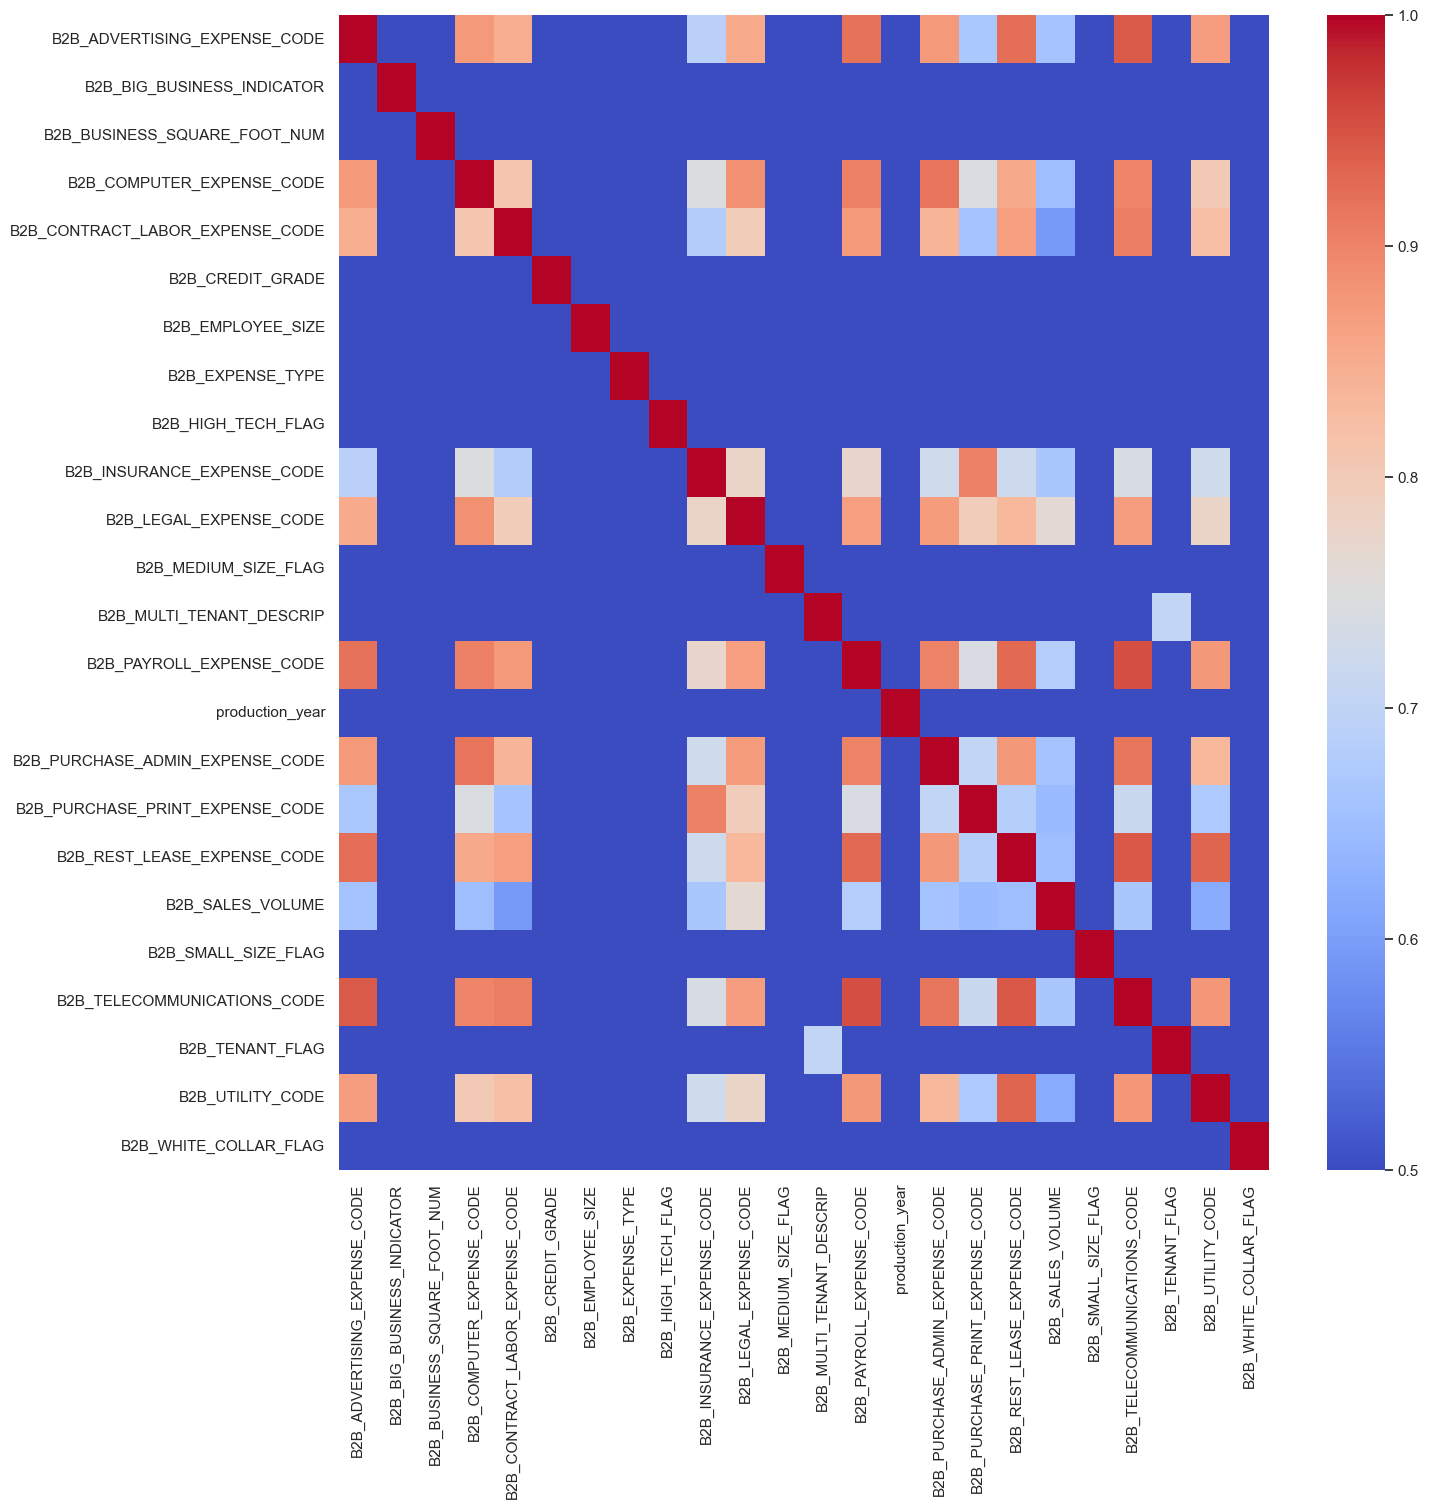

In [20]:
# Heat map showing correlation among attributes
sns.set (rc = {'figure.figsize':(15, 15)})
sns.heatmap(independents.iloc[:,1:].corr(),cmap='coolwarm',vmin=.5)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

---
## Clustering <a class="anchor" id="Clustering"></a>

However, it's important to note that clustering is an exploratory technique, and the resulting clusters may not have any causal or predictive relationship with the outcome of interest. In some cases, clustering may be used as a preprocessing step for other machine learning techniques, such as classification or regression, where the resulting clusters are used as a feature or input to the model.

https://medium.com/geekculture/the-k-modes-as-clustering-algorithm-for-categorical-data-type-bcde8f95efd7

In [ ]:
df_firmographic_copy = df_firmographic.copy()
df_cluster = df_firmographic_copy[[ "B2B_ADDR_STATE", "B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_STATUS_CODE",
"B2B_OFFICE_SIZE",
"B2B_TOT_EMPLOYEE_SIZE",
"B2B_PUBLIC_INDICATOR",
"B2B_IMPORT_EXPORT_FLAG",
"B2B_GOVERNMENT_FLAG",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_OWN_LEASE_FLAG",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_RESTAURANT_SRVCE_TYPE",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"]]
df_cluster_copy = df_cluster.copy()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cluster = df_cluster.apply(le.fit_transform)
df_cluster

In [ ]:
# Importing Libraries

# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install kmodes
#from kmodes.kmodes import KModes

Cao initialization

In [ ]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_cluster)

In [ ]:
fitClusters_cao

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_cluster.columns
clusterCentroidsDf

Huang initialization

In [ ]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df_cluster)

In [ ]:
fitClusters_huang

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_huang.cluster_centroids_)
clusterCentroidsDf.columns = df_cluster.columns
clusterCentroidsDf

Choosing K by comparing Cost against each K

In [ ]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_cluster)
    cost.append(kmode.cost_)

In [ ]:
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

"elbow curve" -> k=3, we do CAO again

In [ ]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_cluster)

In [ ]:
fitClusters_cao

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_cluster.columns
clusterCentroidsDf

combine the prediction to the OG df

In [ ]:
df_cluster = df_cluster_copy.reset_index()

In [ ]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_cluster, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [ ]:
combinedDf.head()

Cluster Identification (Graphic)

In [ ]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

In [ ]:
cluster_0

In [ ]:
cluster_1

In [ ]:
cluster_2

In [ ]:
variable_list = ["B2B_ADDR_STATE", "B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_STATUS_CODE",
"B2B_OFFICE_SIZE",
"B2B_TOT_EMPLOYEE_SIZE",
"B2B_PUBLIC_INDICATOR",
"B2B_IMPORT_EXPORT_FLAG",
"B2B_GOVERNMENT_FLAG",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_OWN_LEASE_FLAG",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_RESTAURANT_SRVCE_TYPE",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE"]
for variable in variable_list:
    plt.subplots(figsize = (15,5))
    sns.countplot(x=combinedDf[variable],order=combinedDf[variable].value_counts().index,hue=combinedDf['cluster_predicted'])
    plt.show()

In [ ]:
variable_list = ["CAC_SEGMENT","B2B_WHITE_COLLAR_PRCNT"]
for variable in variable_list:
    plt.subplots(figsize = [35,16])
    sns.countplot(x=combinedDf[variable],order=combinedDf[variable].value_counts().index[:12],hue=combinedDf['cluster_predicted'])
    plt.show()

need dictionary / explaination of each variable
https://www.kaggle.com/code/ashydv/bank-customer-clustering-k-modes-clustering/notebook
https://medium.com/geekculture/the-k-modes-as-clustering-algorithm-for-categorical-data-type-bcde8f95efd7
https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb

---
## Principal Component Analysis (PCA) <a class="anchor" id="PCA"></a>

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Standardize data before applying PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Apply PCA
pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
dtree = DecisionTreeRegressor(max_depth=12,max_features='auto',max_leaf_nodes=20,min_samples_leaf=5,min_weight_fraction_leaf=0.1,splitter='random')
dtree.fit(X_train,y_train)

In [ ]:
dtree.score(X_train,y_train)

In [ ]:
dtree.score(X_test,y_test)

In [ ]:
y_pred= dtree.predict(X_test_pca)

In [ ]:
# Predict on test set and calculate accuracy
from sklearn.metrics import mean_squared_error, r2_score 
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

# Scikit-learn doesn't have adjusted r-square, hence custom code
n = y_pred.shape[0]
k = X_train.shape[1]
adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)

print(f"rmse: {rmse}, r2: {r2}, adjr2: {adj_r_sq}")

In [ ]:
# Calculate explained variance ratio
exp_var = pca.explained_variance_ratio_
print("Explained variance ratio:", exp_var)

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit a logistic regression model on the transformed data
clf = LogisticRegression(random_state=0)
clf.fit(X_train_pca, y_train)

# Predict on test set and calculate accuracy
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate explained variance ratio
exp_var = pca.explained_variance_ratio_
print("Explained variance ratio:", exp_var)

In [ ]:
dtree.feature_importances_
pd.Series(dtree.feature_importances_,index=X.columns).sort_values(ascending=False)

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

#import sys
#!{sys.executable} -m pip install pydotplus

import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()

export_graphviz(dtree,filled=True,rounded=True, feature_names=X.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

---
## Association Rule Mining <a class="anchor" id="AssociationRuleMining"></a>

---
## Self-Organizing Maps (SOMs) <a class="anchor" id="SOM"></a>

In [ ]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install MiniSom

from minisom import MiniSom
from sklearn import preprocessing

In [ ]:
df_train=df.iloc[:,2:-2]

In [ ]:
le = preprocessing.LabelEncoder()
df_train = df_train.apply(le.fit_transform)
df_train = np.array(df_train)
df_train

In [ ]:
# train MiniSom model
som_shape=(30,30)
som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=68, sigma=1.0, learning_rate=0.5)
som.random_weights_init(df_train)
som.train_random(df_train, 100)

In [ ]:
winner = np.array([som.winner(x) for x in df_train]).T
cluster_index = np.ravel_multi_index(winner, som_shape)

In [ ]:
# plotting the clusters using the first 2 dimentions of the data
plt.figure(figsize = [35,16])
for c in np.unique(cluster_index):
    plt.scatter(df_train[cluster_index == c, 0],
                df_train[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

---
## Multiple Correspondence Analysis (MCA) <a class="anchor" id="MCA"></a>

In [ ]:
#import sys
#-m pip install --upgrade jinja2
#!{sys.executable} -m pip install --user prince

In [23]:
import prince

In [26]:
mca = prince.MCA(n_components=5)
mca = mca.fit(X)

In [27]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.240        42.98%                     42.98%
1              0.041         7.41%                     50.39%
2              0.040         7.20%                     57.59%
3              0.034         6.04%                     63.63%
4              0.031         5.61%                     69.24%

In [28]:
mca.row_coordinates(X).head()

0         1         2         3         4
0 -0.406669 -0.344434 -0.143130 -0.157672 -0.028877
1  1.284128 -0.283702 -0.191736  0.509660  0.409215
2  1.425877 -0.243866 -0.275121  0.239197  0.023631
3  1.095669 -0.409653 -0.190117  0.356234  0.418793
4  0.962036  0.169487 -0.254855 -0.228998 -0.016039

In [29]:
mca.column_coordinates(X)

0         1         2         3   
B2B_ACCOUNTING_EXPENSE_CODE     -0.283954  0.016766 -0.046675 -0.005869  \
B2B_ADVERTISING_EXPENSE_CODE    -0.395209 -0.214758  0.080891  0.009156   
B2B_BIG_BUSINESS_INDICATOR      -0.774240  0.594210  0.834237  1.123952   
B2B_BUSINESS_SQUARE_FOOT_NUM    -0.128568  0.190352  0.616535  0.095767   
B2B_COMPUTER_EXPENSE_CODE       -0.162581 -0.027827  0.065431 -0.104218   
B2B_CONTRACT_LABOR_EXPENSE_CODE -0.335174 -0.335878 -0.036926 -0.161746   
B2B_CREDIT_GRADE                 0.734974 -0.248096 -0.281372  0.304567   
B2B_EMPLOYEE_SIZE               -0.272479  0.386347  0.561248  0.589995   
B2B_EXPENSE_TYPE                 0.569581 -0.008769  0.079557 -0.019958   
B2B_HIGH_TECH_FLAG              -0.063004  0.288689 -0.033698 -0.408552   
B2B_INSURANCE_EXPENSE_CODE      -0.263129  0.340632 -0.136282 -0.166645   
B2B_LEGAL_EXPENSE_CODE          -0.378403  0.016818 -0.091583 -0.016278   
B2B_MEDIUM_SIZE_FLAG            -0.176534  0.994769  1.327558  0.348180   
B2B_MULTI_TENANT_DESCRIP         0.702451  0.065014 -0.019971 -0.163106   
B2B_PAYROLL_EXPENSE_CODE        -0.501398 -0.108322  0.061916 -0.047180   
production_year                  0.598006  0.038353  0.081490  0.007915   
B2B_PURCHASE_ADMIN_EXPENSE_CODE -0.313264 -0.123237  0.079119 -0.072960   
B2B_PURCHASE_PRINT_EXPENSE_CODE -0.304168  0.383624 -0.254145 -0.218049   
B2B_REST_LEASE_EXPENSE_CODE     -0.449018 -0.235006  0.127275  0.022875   
B2B_SALES_VOLUME                -0.471171  0.182142 -0.391855  0.463546   
B2B_SMALL_SIZE_FLAG              1.244407 -0.171883 -0.182836 -0.264064   
B2B_TELECOMMUNICATIONS_CODE     -0.563771 -0.264773 -0.023220 -0.073161   
B2B_TENANT_FLAG                  0.721461  0.059745  0.016136 -0.200366   
B2B_UTILITY_CODE                -0.305175 -0.165187  0.164833  0.036804   
B2B_WHITE_COLLAR_FLAG            0.800157  0.157598  0.198940  0.007594   

                                        4  
B2B_ACCOUNTING_EXPENSE_CODE     -0.042221  
B2B_ADVERTISING_EXPENSE_CODE    -0.083638  
B2B_BIG_BUSINESS_INDICATOR      -0.320638  
B2B_BUSINESS_SQUARE_FOOT_NUM     0.362503  
B2B_COMPUTER_EXPENSE_CODE        0.004764  
B2B_CONTRACT_LABOR_EXPENSE_CODE -0.020567  
B2B_CREDIT_GRADE                 0.218279  
B2B_EMPLOYEE_SIZE               -0.184255  
B2B_EXPENSE_TYPE                 0.080166  
B2B_HIGH_TECH_FLAG               0.587875  
B2B_INSURANCE_EXPENSE_CODE       0.117261  
B2B_LEGAL_EXPENSE_CODE          -0.033126  
B2B_MEDIUM_SIZE_FLAG            -0.250740  
B2B_MULTI_TENANT_DESCRIP        -0.426345  
B2B_PAYROLL_EXPENSE_CODE        -0.032521  
production_year                  0.084011  
B2B_PURCHASE_ADMIN_EXPENSE_CODE -0.015848  
B2B_PURCHASE_PRINT_EXPENSE_CODE  0.213304  
B2B_REST_LEASE_EXPENSE_CODE      0.023818  
B2B_SALES_VOLUME                -0.231073  
B2B_SMALL_SIZE_FLAG              0.153213  
B2B_TELECOMMUNICATIONS_CODE     -0.047146  
B2B_TENANT_FLAG                 -0.500748  
B2B_UTILITY_CODE                 0.084875  
B2B_WHITE_COLLAR_FLAG            0.154192

In [32]:
mca.row_contributions_.head().style.format('{:.000000%}')

In [30]:
mca.column_contributions_.style.format('{:.000000%}')

In [33]:
import altair as alt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [34]:
mca.plot(
    X,
    x_component=0,
    y_component=1
)

alt.Chart(...)

In [35]:
df_transformed = mca.transform(X)

In [36]:
from sklearn.feature_selection import mutual_info_regression
selected_features = mutual_info_regression(df_transformed, df['usage'])

In [37]:
selected_features

array([0.03757884, 0.03947081, 0.04807431, 0.03648446, 0.02583287])

In [38]:
top_features = X.columns[selected_features.argsort()[::-1][:20]]

In [39]:
top_features

Index(['B2B_BIG_BUSINESS_INDICATOR', 'B2B_ADVERTISING_EXPENSE_CODE',
       'B2B_ACCOUNTING_EXPENSE_CODE', 'B2B_BUSINESS_SQUARE_FOOT_NUM',
       'B2B_COMPUTER_EXPENSE_CODE'],
      dtype='object')

**5 most important columns:**

`'B2B_BIG_BUSINESS_INDICATOR', 'B2B_ADVERTISING_EXPENSE_CODE', 'B2B_ACCOUNTING_EXPENSE_CODE', 'B2B_BUSINESS_SQUARE_FOOT_NUM', 'B2B_COMPUTER_EXPENSE_CODE'`

Note that we have exclude the state, growth rate and segment